In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [2]:
data = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022copy3.csv", parse_dates=['Tanggal'], date_format='%d/%m/%Y')

In [3]:
print(data)

         Tanggal OriginTime  Latitude  Longitude  Kedalaman (km)  Magnitude  \
0       1/1/2017   04:58:14   -8.9300   110.0500              10        4.0   
1       1/2/2017   21:02:24   -8.9400   108.7500              10        5.3   
2       1/3/2017   03:52:37   -8.3900   110.6900              10        3.1   
3       1/4/2017   00:44:38   -9.2700   113.4800              10        3.4   
4       1/5/2017   20:07:56   -9.8100   111.7500              10        3.2   
...          ...        ...       ...        ...             ...        ...   
2177  12/27/2022   00:38:27   -7.8601   110.5298              13        1.3   
2178  12/28/2022   02:19:49   -8.8718   112.4565              44        3.2   
2179  12/29/2022   00:33:56   -9.0316   112.1481              10        3.2   
2180  12/30/2022   00:02:38  -10.2996   113.2803              10        3.6   
2181  12/31/2022   01:02:38  -10.2996   113.2803              10        3.6   

     Type                                         K

In [4]:
latitude = data["Latitude"]
longitude = data["Longitude"]
kedalaman = data["Kedalaman (km)"]
magnitude = data["Magnitude"]

In [5]:
checkpoint = ModelCheckpoint('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_1.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [6]:
gempa_semua = []
for index in range(len(latitude)):
  gempa = []
  gempa.append(latitude[index])
  gempa.append(longitude[index])
  gempa.append(kedalaman[index])

  gempa_semua.append(gempa)

In [7]:
gempa_semua = np.array(gempa_semua)

In [8]:
print(gempa_semua)

[[ -8.93   110.05    10.    ]
 [ -8.94   108.75    10.    ]
 [ -8.39   110.69    10.    ]
 ...
 [ -9.0316 112.1481  10.    ]
 [-10.2996 113.2803  10.    ]
 [-10.2996 113.2803  10.    ]]


In [9]:
magnitude = magnitude.astype('float64')
longitude = longitude.astype('float64')
latitude = latitude.astype('float64')

In [10]:
magnitude.dtype

dtype('float64')

In [11]:
longitude.dtype

dtype('float64')

In [12]:
latitude.dtype

dtype('float64')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(gempa_semua, magnitude, test_size=0.3, random_state=42)

In [14]:
X_valid, X_training, y_valid, y_training = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
print(X_valid)

[[ -9.67      112.9        10.       ]
 [ -7.1       107.4757765  12.       ]
 [ -8.92684   109.96698    10.       ]
 ...
 [ -8.41525   111.00233    75.       ]
 [ -9.2558    113.3856     28.       ]
 [ -8.91      113.65       10.       ]]


In [16]:
print("Shape of training data:")
print("X_training:", X_training.shape)
print("y_training:", y_training.shape)
print("Shape of validation data:")
print("X_valid:", X_valid.shape)
print("y_valid:", y_valid.shape)


Shape of training data:
X_training: (306, 3)
y_training: (306,)
Shape of validation data:
X_valid: (1221, 3)
y_valid: (1221,)


In [17]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3,),  kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(192, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1024      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 192)               49344     
                                                                 
 dense_2 (Dense)             (None, 128)               24704     
                                                                 
 dense_3 (Dense)             (None, 48)                6192      
                                                                 
 dense_4 (Dense)             (None, 32)                1568      
                                                                 
 dense_5 (Dense)             (None, 16)                5

In [18]:
for i, layer in enumerate(model.layers):
    if isinstance(layer, tf.keras.layers.Dense):
        print(f"Hidden Layer {i}: {layer.units} units, Activation: {layer.activation.__name__}")

Hidden Layer 0: 256 units, Activation: relu
Hidden Layer 2: 192 units, Activation: relu
Hidden Layer 3: 128 units, Activation: relu
Hidden Layer 4: 48 units, Activation: relu
Hidden Layer 5: 32 units, Activation: relu
Hidden Layer 6: 16 units, Activation: relu
Hidden Layer 7: 8 units, Activation: relu
Hidden Layer 8: 1 units, Activation: linear


In [19]:
optimizer = Adam(learning_rate=0.001)

In [20]:
model.compile(optimizer=optimizer, loss='mse')

In [21]:
history = model.fit(X_training, y_training, batch_size=64, epochs=3000, verbose=1, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Epoch 1/3000
1/5 [=====>........................] - ETA: 2s - loss: 9.5324
Epoch 1: val_loss improved from inf to 3.13757, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
5/5 [==============================] - 1s 59ms/step - loss: 4.6359 - val_loss: 3.1376
Epoch 2/3000
1/5 [=====>........................] - ETA: 0s - loss: 3.6400
Epoch 2: val_loss improved from 3.13757 to 2.03553, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
5/5 [==============================] - 0s 21ms/step - loss: 2.2818 - val_loss: 2.0355
Epoch 3/3000
1/5 [=====>........................] - ETA: 0s - loss: 2.3446
Epoch 3: val_loss improved from 2.03553 to 1.84448, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
5/5 [==============================] - 0s 20ms/step - loss: 1.9562 - val_loss: 1.8445
Epoch 4/3000
1/5 [=====>........................] - ETA: 0s - loss: 1.9298
Epoch 4: val_loss improved from 1.84448 t

In [22]:
model = load_model("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_1.h5")
error = model.evaluate(X_valid, y_valid)
error_percentage = error
print("Loss: ", error_percentage)

39/39 [==============================] - 0s 915us/step - loss: 0.3999
Loss:  0.399917870759964


data X_test yang harus dimasukkan dibagian input user

latitude_subset = latitude[:100]
longitude_subset = longitude[:100]
kedalaman_subset = kedalaman[:100]

In [23]:
count = 0  # Variable to count the number of predicted data
predictions = np.array([])  # Array to store the predicted values

for test in X_test:
    koordinat_latitude = float(test[0])
    koordinat_longitude = float(test[1])
    kedalaman_gempa = float(test[2])

    input_data = np.array([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
    hasil_prediksi = model.predict(input_data)

    # Concatenate the predicted value to the predictions array
    predictions = np.concatenate([predictions, hasil_prediksi.flatten()])

    # Increase the count by 1
    count += 1

    # Print the prediction
    print("Perkiraan kekuatan gempa {} Mg".format(hasil_prediksi))

    if count == 365:
        break

print("Banyaknya data yang diprediksi:", count)


1/1 [==============================] - 0s 95ms/step
Perkiraan kekuatan gempa [[3.9126303]] Mg
1/1 [==============================] - 0s 18ms/step
Perkiraan kekuatan gempa [[3.1922393]] Mg
1/1 [==============================] - 0s 17ms/step
Perkiraan kekuatan gempa [[3.22111]] Mg
1/1 [==============================] - 0s 18ms/step
Perkiraan kekuatan gempa [[2.9625006]] Mg
1/1 [==============================] - 0s 17ms/step
Perkiraan kekuatan gempa [[3.072353]] Mg
1/1 [==============================] - 0s 18ms/step
Perkiraan kekuatan gempa [[3.2480266]] Mg
1/1 [==============================] - 0s 17ms/step
Perkiraan kekuatan gempa [[0.05983657]] Mg
1/1 [==============================] - 0s 18ms/step
Perkiraan kekuatan gempa [[2.3496158]] Mg
1/1 [==============================] - 0s 18ms/step
Perkiraan kekuatan gempa [[2.853133]] Mg
1/1 [==============================] - 0s 19ms/step
Perkiraan kekuatan gempa [[3.4888535]] Mg
1/1 [==============================] - 0s 18ms/step
Perkiraan k

count = 0  # Variable to count the number of predicted data
predictions = []  # List to store the predicted values

for i in range(len(latitude_subset)):
    for j in range(len(longitude_subset)):
        for k in range(len(kedalaman_subset)):
            koordinat_latitude = float(latitude_subset[i])
            koordinat_longitude = float(longitude_subset[j])
            kedalaman_gempa = float(kedalaman_subset[k])

            input_data = np.array([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
            hasil_prediksi = model.predict(input_data)

            # Append the predicted value to the list
            predictions.append(hasil_prediksi)

            # Increase the count by 1
            count += 1

            # Print the prediction
            print("Perkiraan kekuatan gempa {} Mg".format(hasil_prediksi))

            if count == 100:
                break
        else:
            continue
        break
    else:
        continue
    break

# Convert the list of predictions to a NumPy array
predictions = np.array(predictions)

print("Banyaknya data yang diprediksi:", count)


In [24]:
#koordinat_latitude = float(input("Masukkan koordinat latitude anda : "))
#koordinat_longitude = float(input("Masukkan koordinat longitude anda: "))
#kedalaman_gempa = float(input("Masukkan Kedalaman Gempa dalam (Km): "))

In [25]:
#prediksi_gempa = model.predict([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
#print("Perkiraan kekuatan gempa {} Mg".format(prediksi_gempa))

In [26]:
print(predictions)

[3.91263032e+00 3.19223928e+00 3.22111011e+00 2.96250057e+00
 3.07235289e+00 3.24802661e+00 5.98365664e-02 2.34961581e+00
 2.85313296e+00 3.48885345e+00 3.32554960e+00 3.13396668e+00
 3.11153245e+00 3.25971413e+00 2.36050487e-02 3.29816031e+00
 3.33103299e+00 3.09169030e+00 3.10134602e+00 3.41870928e+00
 3.08020544e+00 2.71844268e-02 3.25114226e+00 3.28750205e+00
 3.86782598e+00 3.23301315e+00 3.07827663e+00 7.31194615e-02
 3.46731257e+00 3.44740391e+00 1.18258536e-01 3.76591158e+00
 3.21162724e+00 1.10861242e-01 7.51912594e-04 3.47452354e+00
 3.24774027e+00 3.40076947e+00 3.25196600e+00 3.10195351e+00
 3.00502896e+00 3.03279734e+00 9.58399177e-02 8.67503881e-03
 3.09406567e+00 3.25152445e+00 3.42873931e-02 7.44768977e-02
 3.30218458e+00 7.56987929e-02 3.25184536e+00 3.32562041e+00
 3.45157528e+00 3.45269895e+00 3.19973016e+00 3.12191677e+00
 3.48967981e+00 1.66289067e+00 3.17607617e+00 4.55953121e+00
 2.89452553e+00 3.44114733e+00 8.52426887e-02 3.22291279e+00
 6.88737631e-03 3.149610

In [27]:
flattened_array = predictions

In [28]:
magnitude_subset = magnitude[:365]

In [29]:
x = data['Tanggal'][:365]
y_data_asli = magnitude_subset
y_data_forecasted = flattened_array

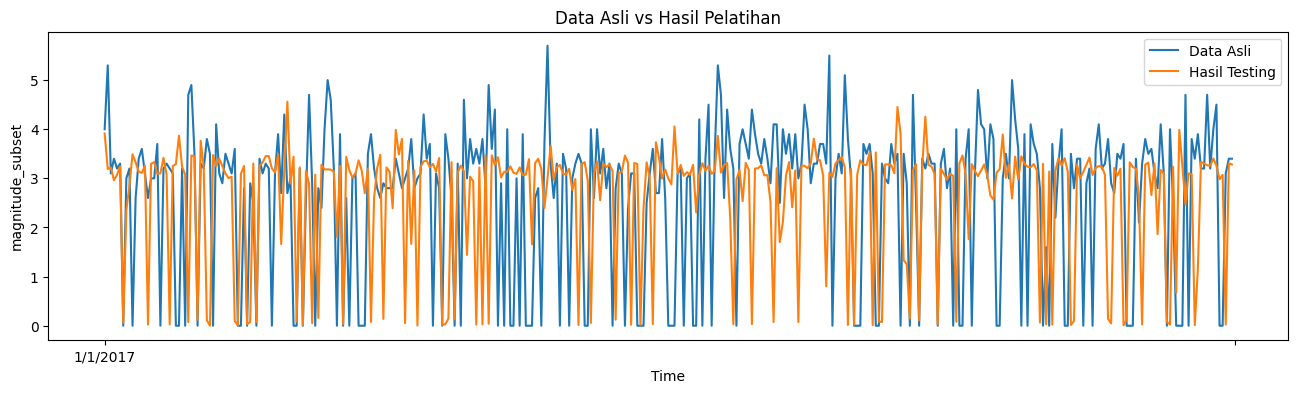

In [30]:
plt.figure(figsize=(16, 4))
plt.plot(x, y_data_asli, label='Data Asli')
plt.plot(x, y_data_forecasted, label='Hasil Testing')
plt.xlabel('Time')
plt.ylabel('magnitude_subset')
plt.title('Data Asli vs Hasil Pelatihan')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.legend()
plt.show()

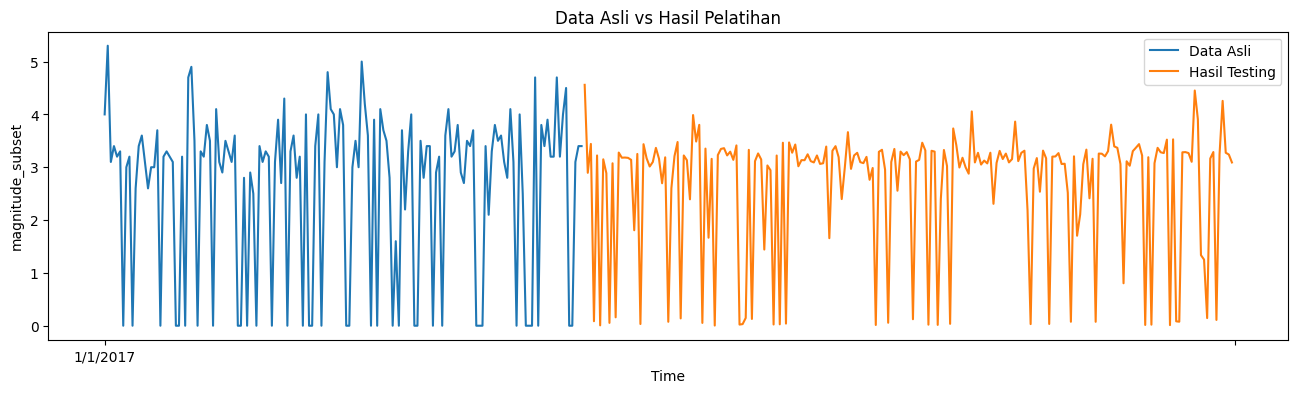

In [31]:
# Set the x-axis range for the plot
x_data_asli = x[x <= '2022']
x_data_forecasted = x[x >= '2023']

# Create the plot
plt.figure(figsize=(16, 4))
plt.plot(x_data_asli, y_data_asli[x <= '2022'], label='Data Asli')
plt.plot(x_data_forecasted, y_data_forecasted[x >= '2023'], label='Hasil Testing')
plt.xlabel('Time')
plt.ylabel('magnitude_subset')
plt.title('Data Asli vs Hasil Pelatihan')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.legend()
plt.show()


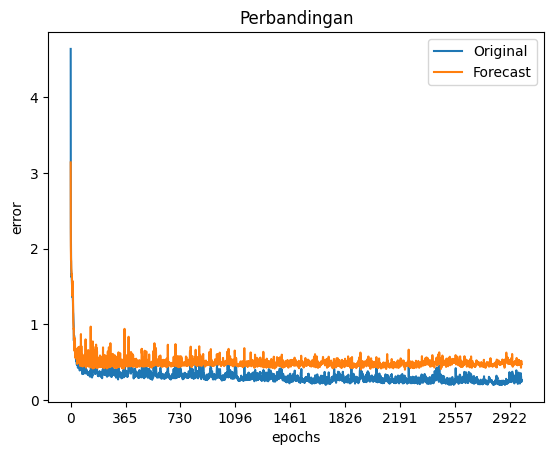

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Perbandingan')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend(['Original', 'Forecast'], loc='upper right')
plt.show()